# 3-2,中阶API示范

下面的范例使用Pytorch的中阶API实现线性回归模型和和DNN二分类模型。

Pytorch的中阶API主要包括各种模型层，损失函数，优化器，数据管道等等。

In [1]:
import os
import datetime

#打印时间
def printbar():
    nowtime = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    print("\n"+"=========="*8 + "%s"%nowtime)

#mac系统上pytorch和matplotlib在jupyter中同时跑需要更改环境变量
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE" 


### 一，线性回归模型

**1，准备数据**

In [2]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt 
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import Dataset,DataLoader,TensorDataset

#样本数量
n = 400

# 生成测试用数据集
X = 10*torch.rand([n,2])-5.0  #torch.rand是均匀分布 
w0 = torch.tensor([[2.0],[-3.0]])
b0 = torch.tensor([[10.0]])
Y = X@w0 + b0 + torch.normal( 0.0,2.0,size = [n,1])  # @表示矩阵乘法,增加正态扰动


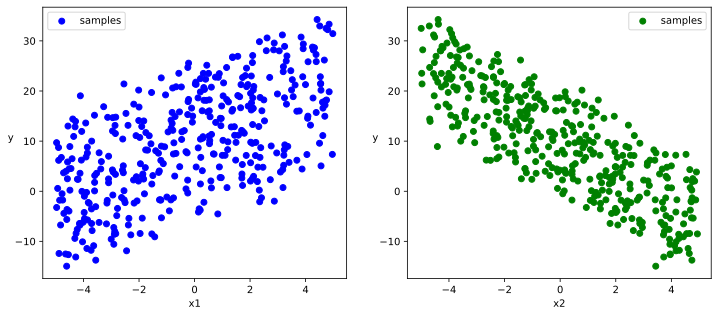

In [3]:
# 数据可视化

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

plt.figure(figsize = (12,5))
ax1 = plt.subplot(121)
ax1.scatter(X[:,0],Y[:,0], c = "b",label = "samples")
ax1.legend()
plt.xlabel("x1")
plt.ylabel("y",rotation = 0)

ax2 = plt.subplot(122)
ax2.scatter(X[:,1],Y[:,0], c = "g",label = "samples")
ax2.legend()
plt.xlabel("x2")
plt.ylabel("y",rotation = 0)
plt.show()


![](./data/3-2-线性回归数据可视化.png)

In [4]:
#构建输入数据管道
ds = TensorDataset(X,Y)
dl = DataLoader(ds,batch_size = 10,shuffle=True,num_workers=2)


In [7]:
dl

**2，定义模型**

In [16]:
model = nn.Linear(2,1) #线性层

model.loss_func = nn.MSELoss()
model.optimizer = torch.optim.SGD(model.parameters(),lr = 0.01)


**3，训练模型**

In [9]:
def train_step(model, features, labels):
    
    predictions = model(features)
    loss = model.loss_func(predictions,labels)
    loss.backward()
    model.optimizer.step()
    model.optimizer.zero_grad()
    return loss.item()

# 测试train_step效果
features,labels = next(iter(dl))
train_step(model,features,labels)



221.8861846923828

```
269.98016357421875
```

In [10]:
def train_model(model,epochs):
    for epoch in range(1,epochs+1):
        for features, labels in dl:
            loss = train_step(model,features,labels)
        if epoch%50==0:
            printbar()
            w = model.state_dict()["weight"]
            b = model.state_dict()["bias"]
            print("epoch =",epoch,"loss = ",loss)
            print("w =",w)
            print("b =",b)
train_model(model,epochs = 200)



================================================================================2021-06-30 22:32:14
epoch = 50 loss =  3.950751781463623
w = tensor([[ 1.9310, -3.0210]])
b = tensor([10.1098])

================================================================================2021-06-30 22:32:17
epoch = 100 loss =  5.096994400024414
w = tensor([[ 1.9988, -3.0291]])
b = tensor([10.1381])

================================================================================2021-06-30 22:32:20
epoch = 150 loss =  2.0867137908935547
w = tensor([[ 1.9903, -3.0620]])
b = tensor([10.1172])

================================================================================2021-06-30 22:32:24
epoch = 200 loss =  1.9235255718231201
w = tensor([[ 2.0960, -2.9947]])
b = tensor([10.1251])


```
================================================================================2020-07-05 22:51:53
epoch = 50 loss =  3.0177409648895264
w = tensor([[ 1.9315, -2.9573]])
b = tensor([9.9625])

================================================================================2020-07-05 22:51:57
epoch = 100 loss =  2.1144354343414307
w = tensor([[ 1.9760, -2.9398]])
b = tensor([9.9428])

================================================================================2020-07-05 22:52:01
epoch = 150 loss =  3.290461778640747
w = tensor([[ 2.1075, -2.9509]])
b = tensor([9.9599])

================================================================================2020-07-05 22:52:06
epoch = 200 loss =  3.047853469848633
w = tensor([[ 2.1134, -2.9306]])
b = tensor([9.9722])
```

In [3]:
# 结果可视化

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

w,b = model.state_dict()["weight"],model.state_dict()["bias"]

plt.figure(figsize = (12,5))
ax1 = plt.subplot(121)
ax1.scatter(X[:,0],Y[:,0], c = "b",label = "samples")
ax1.plot(X[:,0],w[0,0]*X[:,0]+b[0],"-r",linewidth = 5.0,label = "model")
ax1.legend()
plt.xlabel("x1")
plt.ylabel("y",rotation = 0)



ax2 = plt.subplot(122)
ax2.scatter(X[:,1],Y[:,0], c = "g",label = "samples")
ax2.plot(X[:,1],w[0,1]*X[:,1]+b[0],"-r",linewidth = 5.0,label = "model")
ax2.legend()
plt.xlabel("x2")
plt.ylabel("y",rotation = 0)

plt.show()


NameError: name 'model' is not defined

![](./data/3-2-回归结果可视化.png)

### 二， DNN二分类模型

**1，准备数据**

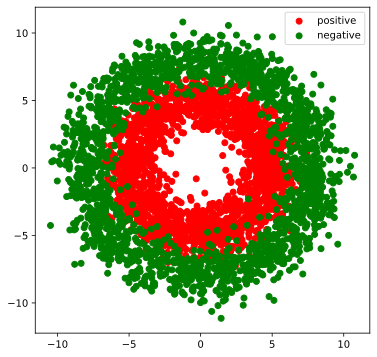

In [4]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import Dataset,DataLoader,TensorDataset
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

#正负样本数量
n_positive,n_negative = 2000,2000

#生成正样本, 小圆环分布
r_p = 5.0 + torch.normal(0.0,1.0,size = [n_positive,1]) 
theta_p = 2*np.pi*torch.rand([n_positive,1])
Xp = torch.cat([r_p*torch.cos(theta_p),r_p*torch.sin(theta_p)],axis = 1)
Yp = torch.ones_like(r_p)

#生成负样本, 大圆环分布
r_n = 8.0 + torch.normal(0.0,1.0,size = [n_negative,1]) 
theta_n = 2*np.pi*torch.rand([n_negative,1])
Xn = torch.cat([r_n*torch.cos(theta_n),r_n*torch.sin(theta_n)],axis = 1)
Yn = torch.zeros_like(r_n)

#汇总样本
X = torch.cat([Xp,Xn],axis = 0)
Y = torch.cat([Yp,Yn],axis = 0)


#可视化
plt.figure(figsize = (6,6))
plt.scatter(Xp[:,0],Xp[:,1],c = "r")
plt.scatter(Xn[:,0],Xn[:,1],c = "g")
plt.legend(["positive","negative"]);


![](./data/3-2-分类数据可视化.png)

In [5]:
#构建输入数据管道
ds = TensorDataset(X,Y)
dl = DataLoader(ds,batch_size = 10,shuffle=True,num_workers=2)



**2, 定义模型**

In [6]:
class DNNModel(nn.Module):
    def __init__(self):
        super(DNNModel, self).__init__()
        self.fc1 = nn.Linear(2,4)
        self.fc2 = nn.Linear(4,8) 
        self.fc3 = nn.Linear(8,1)

    # 正向传播
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        y = nn.Sigmoid()(self.fc3(x))
        return y
    
    # 损失函数
    def loss_func(self,y_pred,y_true):
        return nn.BCELoss()(y_pred,y_true)
    
    # 评估函数(准确率)
    def metric_func(self,y_pred,y_true):
        y_pred = torch.where(y_pred>0.5,torch.ones_like(y_pred,dtype = torch.float32),
                          torch.zeros_like(y_pred,dtype = torch.float32))
        acc = torch.mean(1-torch.abs(y_true-y_pred))
        return acc
    
    # 优化器
    @property
    def optimizer(self):
        return torch.optim.Adam(self.parameters(),lr = 0.001)
    
model = DNNModel()


In [7]:
# 测试模型结构
(features,labels) = next(iter(dl))
predictions = model(features)

loss = model.loss_func(predictions,labels)
metric = model.metric_func(predictions,labels)

print("init loss:",loss.item())
print("init metric:",metric.item())


init loss: 0.6572853326797485
init metric: 0.800000011920929


```
init loss: 0.7065666913986206
init metric: 0.6000000238418579
```

**3，训练模型**

In [8]:
def train_step(model, features, labels):
    
    # 正向传播求损失
    predictions = model(features)
    loss = model.loss_func(predictions,labels)
    metric = model.metric_func(predictions,labels)
    
    # 反向传播求梯度
    loss.backward()
    
    # 更新模型参数
    model.optimizer.step()
    model.optimizer.zero_grad()
    
    return loss.item(),metric.item()

# 测试train_step效果
features,labels = next(iter(dl))
train_step(model,features,labels)


(0.7225241661071777, 0.5)

```
(0.6048880815505981, 0.699999988079071)
```

In [ ]:
def train_model(model,epochs):
    for epoch in range(1,epochs+1):
        loss_list,metric_list = [],[]
        for features, labels in dl:
            lossi,metrici = train_step(model,features,labels)
            loss_list.append(lossi)
            metric_list.append(metrici)
        loss = np.mean(loss_list)
        metric = np.mean(metric_list)

        if epoch%100==0:
            printbar()
            print("epoch =",epoch,"loss = ",loss,"metric = ",metric)
        
train_model(model,epochs = 300)

```
================================================================================2020-07-05 22:56:38
epoch = 100 loss =  0.23532892110607917 metric =  0.934749992787838

================================================================================2020-07-05 22:58:18
epoch = 200 loss =  0.24743918558603128 metric =  0.934999993443489

================================================================================2020-07-05 22:59:56
epoch = 300 loss =  0.2936080049697884 metric =  0.931499992609024
```

In [ ]:
# 结果可视化
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize = (12,5))
ax1.scatter(Xp[:,0],Xp[:,1], c="r")
ax1.scatter(Xn[:,0],Xn[:,1],c = "g")
ax1.legend(["positive","negative"]);
ax1.set_title("y_true");

Xp_pred = X[torch.squeeze(model.forward(X)>=0.5)]
Xn_pred = X[torch.squeeze(model.forward(X)<0.5)]

ax2.scatter(Xp_pred[:,0],Xp_pred[:,1],c = "r")
ax2.scatter(Xn_pred[:,0],Xn_pred[:,1],c = "g")
ax2.legend(["positive","negative"]);
ax2.set_title("y_pred");


![](./data/3-2-分类结果可视化.png)

**如果本书对你有所帮助，想鼓励一下作者，记得给本项目加一颗星星star⭐️，并分享给你的朋友们喔😊!** 

如果对本书内容理解上有需要进一步和作者交流的地方，欢迎在公众号"算法美食屋"下留言。作者时间和精力有限，会酌情予以回复。

也可以在公众号后台回复关键字：**加群**，加入读者交流群和大家讨论。

![算法美食屋logo.png](./data/算法美食屋二维码.jpg)